# Investigating regions

This part of the investigation will focus on visualizing data and data distribution. I will use geoplots, histograms, Q-Q plots for testing data normality and box and whisker plots to get better insight on data



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

I will import my original data and usefor them for the initial geoplots. They will give me an overal picture.

In [2]:
#loading datasets

%store -r df1_new
%store -r df2_new
%store -r df3_new
%store -r df4_new
%store -r df5_new

In [3]:
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

I will use red color scale, with dark red being the highest score and light red lowest. Having one color will help me to see easier what are the differences in the score across the globe. 

In [4]:
#creating geoplots for years 2015-2019 on the world level.
data15=dict(type='choropleth',
          locations=df1_new['country'],
          locationmode='country names',
          colorscale="reds",
          text=df1_new['country'],
          z=df1_new['happiness score'],
          colorbar={'title':'Happiness score'})

layout15=dict(title='2015 World Happiness Score',geo=dict(showframe=True,projection={'type':'natural earth'}))
choromap=go.Figure(data=[data15],layout=layout15)
iplot(choromap)

In [5]:
data16=dict(type='choropleth',
          locations=df2_new['country'],
          locationmode='country names',
          colorscale="reds",
          text=df2_new['country'],
          z=df2_new['happiness score'],
          colorbar={'title':'Happiness score'})

layout16=dict(title='2016 World Happiness Score',geo=dict(showframe=True,projection={'type':'natural earth'}))
choromap=go.Figure(data=[data16],layout=layout16)
iplot(choromap)

In [6]:
data17=dict(type='choropleth',
          locations=df3_new['country'],
          locationmode='country names',
          colorscale="reds",
          text=df3_new['country'],
          z=df3_new['happiness score'],
          colorbar={'title':'Happiness score'})

layout17=dict(title='2017 World Happiness Score',geo=dict(showframe=True,projection={'type':'natural earth'}))
choromap=go.Figure(data=[data17],layout=layout17)
iplot(choromap)

In [7]:
data18=dict(type='choropleth',
          locations=df4_new['country'],
          locationmode='country names',
          colorscale="reds",
          text=df4_new['country'],
          z=df4_new['happiness score'],
          colorbar={'title':'Happiness score'})

layout18=dict(title='2018 World Happiness Score',geo=dict(showframe=True,projection={'type':'natural earth'}))
choromap=go.Figure(data=[data18],layout=layout18)
iplot(choromap)

In [8]:
data19=dict(type='choropleth',
          locations=df5_new['country'],
          locationmode='country names',
          colorscale="reds",
          text=df5_new['country'],
          z=df5_new['happiness score'],
          colorbar={'title':'Happiness score'})

layout19=dict(title='2019 World Happiness Score',geo=dict(showframe=True,projection={'type':'natural earth'}))
choromap=go.Figure(data=[data19],layout=layout19)
iplot(choromap)

Only by looking at the above plots, I could notice few things.

- When we look at regions (and remember our regions are 'Southern Asia', 'Central and Eastern Europe','Middle East and Northern Africa', 'Latin America and Caribbean','Australia and New Zealand', 'Western Europe', 'Sub-Saharan Africa', 'Southeastern Asia', 'North America','Eastern Asia') it seems that Australia and New Zeland has the highest happiness score, followed closely by North America. 
- Africa has the lowest hapiness score but we can see the difference between Middle East and Northern Africa(higer scores) and Sub-Saharan Africa(lower scores). 
- Similarly Western Europe has higher scores than Central and Eastern Europe. 
- There seem to be at least few countries whose happines score is dropping continuously (Venezuela, Russia, Kazakhstan, Thailand, Algeria..) In some countries (Honduras, Mogolia) the score is increasing. 

From all this I can think of two ways in approaching analysis and visualization. I can investigate regions and countries.

I will present the distribution of happiness score in 2015 accross regions and using histograms. I will also use Q-Q plots to test normality and box-and-whisker plots for outliers. These all will hopefully help me to see the distribution of data better and to decide whether the mean would be good measure of central tendency. 

In [9]:
#histogram function that can be used for any dataframe

def hist_plot(frame):
    fig,((ax1,ax2,ax3,ax4,ax5),(ax6,ax7,ax8,ax9,ax10))=plt.subplots(2,5,sharex=False,sharey=True,figsize=(15,8))

    axs=[ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10]
    scores=[frame[frame['region']=='Western Europe']['happiness score'],frame[frame['region']=='Central and Eastern Europe']['happiness score'],
            frame[frame['region']=='Middle East and Northern Africa']['happiness score'],
            frame[frame['region']=='Sub-Saharan Africa']['happiness score'],
            frame[frame['region']=='Southern Asia']['happiness score'],
            frame[frame['region']=='Southeastern Asia']['happiness score'],
            frame[frame['region']=='Eastern Asia']['happiness score'],
            frame[frame['region']=='Australia and New Zealand']['happiness score'],
            frame[frame['region']=='North America']['happiness score'],
            frame[frame['region']=='Latin America and Caribbean']['happiness score']]

    #I will choose different number of bins for sifferent region as their number of countries differs a lot
    for n in (0,1,2,3,9):
        axs[n].hist(scores[n],color='orange',bins=15,edgecolor="white")
    for n in (4,5,6,7,8):
        axs[n].hist(scores[n],color='orange',bins=5,edgecolor="white")


    plt.suptitle('Happines score distribution in accross regions',size=15)   

    ax1.set_title('Western Europe',size=10)
    ax2.set_title('Central and Eatsern Europe',size=10)
    ax3.set_title('Middle East and Northern Africa',size=10)
    ax4.set_title("Sub-Saharan Africa",size=10)
    ax5.set_title('Southern Asia',size=10)
    ax6.set_title('Southeastern Asia',size=10)
    ax7.set_title('Easter Asia',size=10)
    ax8.set_title('Australia and New Zealand',size=10)
    ax9.set_title('North America',size=10)
    ax10.set_title('Latin America and Caribbean',size=10)


    for ax in axs:
        ax.spines['bottom'].set_color('lightgrey')
        ax.spines['top'].set_color('white')
        ax.spines['left'].set_color('lightgrey')
        ax.spines['right'].set_color('white')


    plt.show()

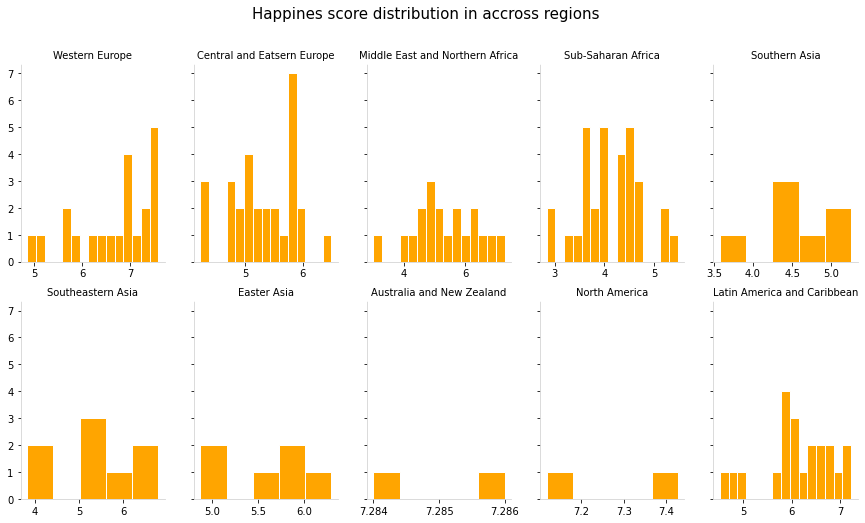

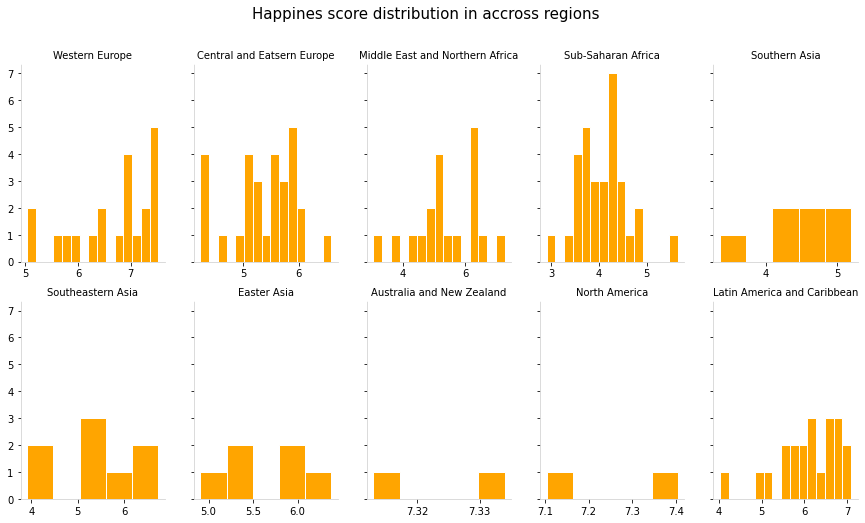

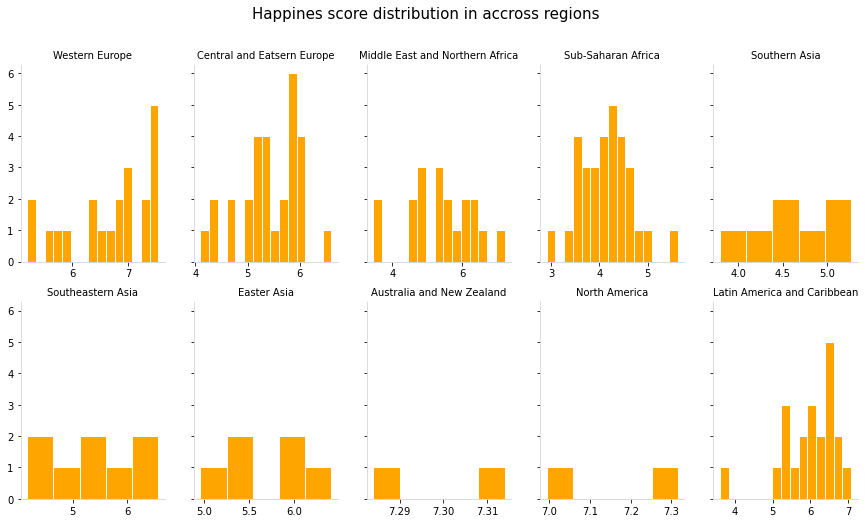

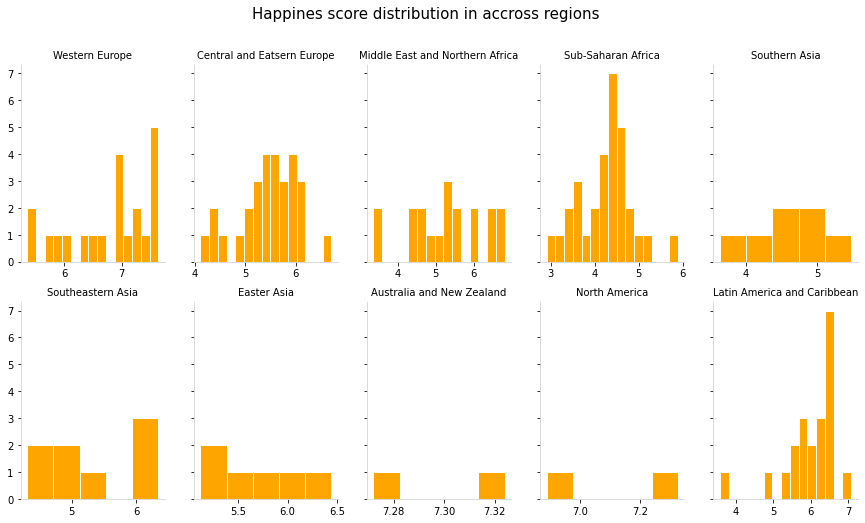

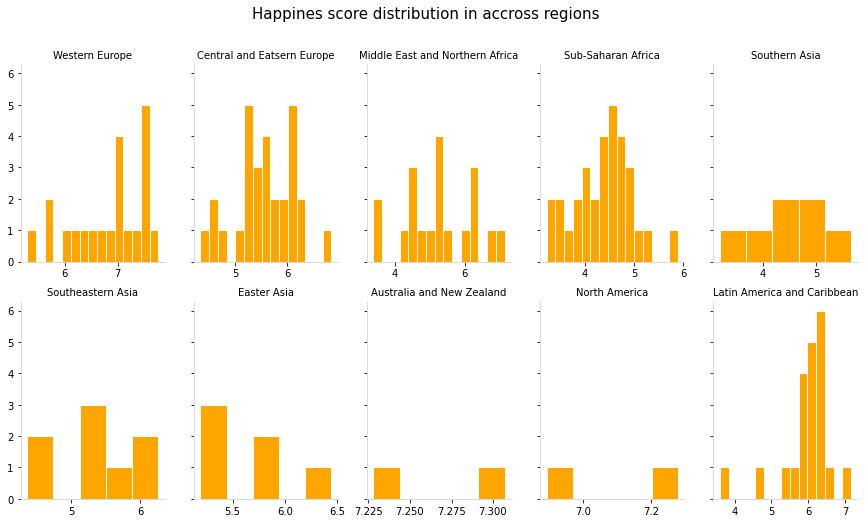

In [10]:
frames=[df1_new,df2_new,df3_new,df4_new,df5_new]
for frame in frames:
    hist_plot(frame)

In [11]:
#qq-Plot function
def qq_plot(frame):
    import warnings
    warnings.filterwarnings('ignore')

    import statsmodels.api as sm
    fig,axes=plt.subplots(2,5,sharex=False,sharey=True,figsize=(15,8))
    plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.5, wspace=0.4)
    scores=[frame[frame['region']=='Western Europe']['happiness score'],frame[frame['region']=='Central and Eastern Europe']['happiness score'],
            frame[frame['region']=='Middle East and Northern Africa']['happiness score'],
            frame[frame['region']=='Sub-Saharan Africa']['happiness score'],
            frame[frame['region']=='Southern Asia']['happiness score'],
            frame[frame['region']=='Southeastern Asia']['happiness score'],
            frame[frame['region']=='Eastern Asia']['happiness score'],
            frame[frame['region']=='Australia and New Zealand']['happiness score'],
            frame[frame['region']=='North America']['happiness score'],
            frame[frame['region']=='Latin America and Caribbean']['happiness score']]

    axs=axes.flatten()

    for n in range(0,10):
        sm.qqplot(scores[n],line='s',ax=axs[n])

    axs[0].set_title('Western Europe',size=10)
    axs[1].set_title('Central and Eatsern Europe',size=10)
    axs[2].set_title('Middle East and Northern Africa',size=10)
    axs[3].set_title("Sub-Saharan Africa",size=10)
    axs[4].set_title('Southern Asia',size=10)
    axs[5].set_title('Southeastern Asia',size=10)
    axs[6].set_title('Easter Asia',size=10)
    axs[7].set_title('Australia and New Zealand',size=10)
    axs[8].set_title('North America',size=10)
    axs[9].set_title('Latin America and Caribbean',size=10)


    for ax in axs:
        ax.spines['bottom'].set_color('lightgrey')
        ax.spines['top'].set_color('white')
        ax.spines['left'].set_color('lightgrey')
        ax.spines['right'].set_color('white')

    plt.show()



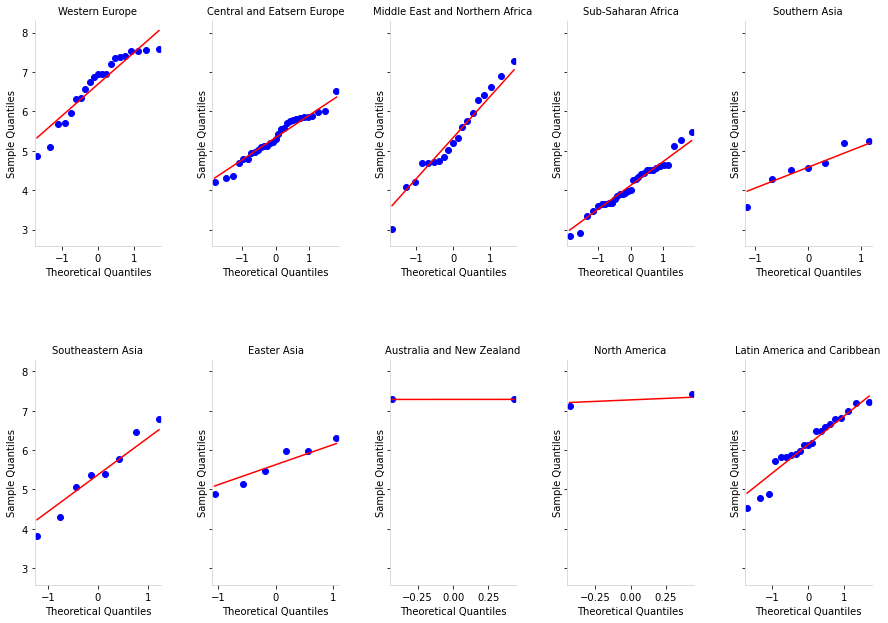

In [12]:
qq_plot(df1_new)

In [13]:
import seaborn as sns

In [14]:
#boxplot function
def box_plot(frame):
    plt.figure(figsize=(10,10))
    sns.boxplot(data=frame,x='region',y='happiness score',)
    plt.xticks(rotation='vertical')

    ax=plt.gca()
    ax.spines[['top','right']].set_color('white')
    ax.spines[['bottom','left']].set_color('lightgrey')

    plt.show()

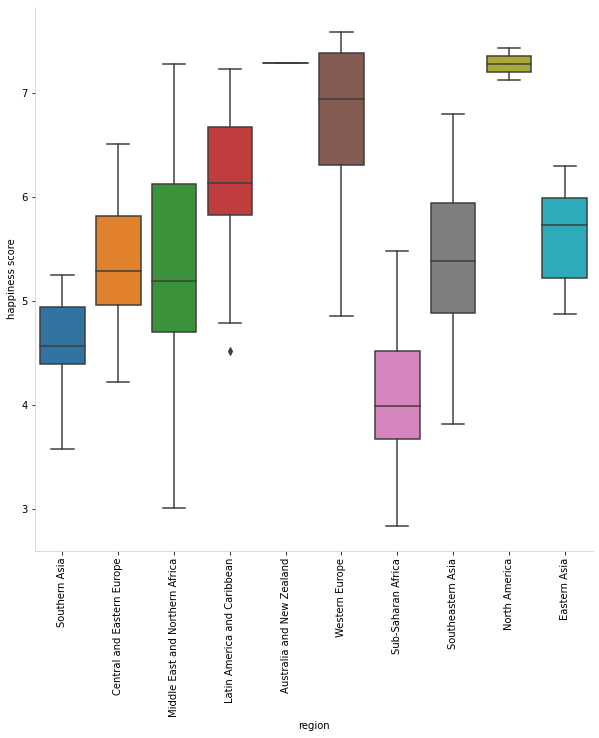

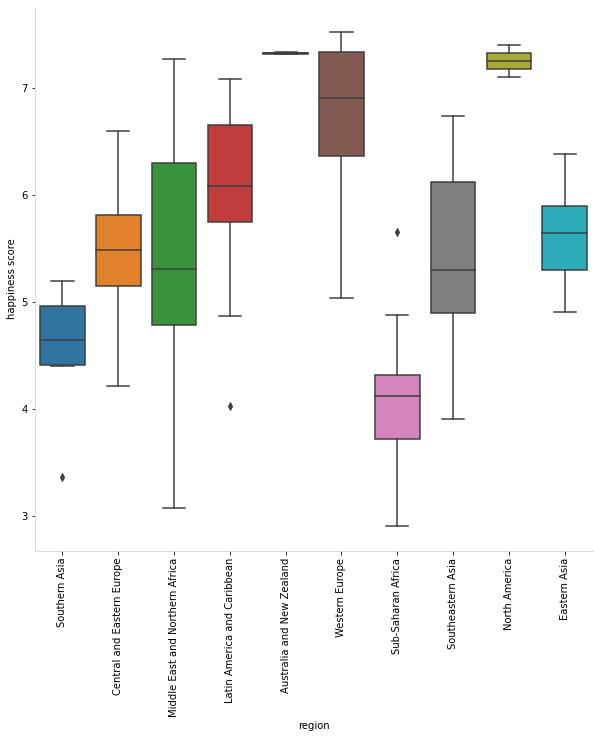

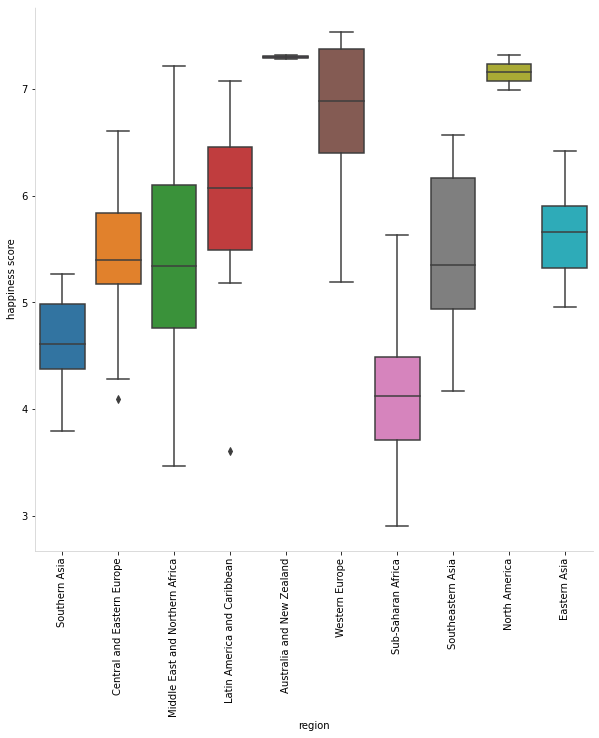

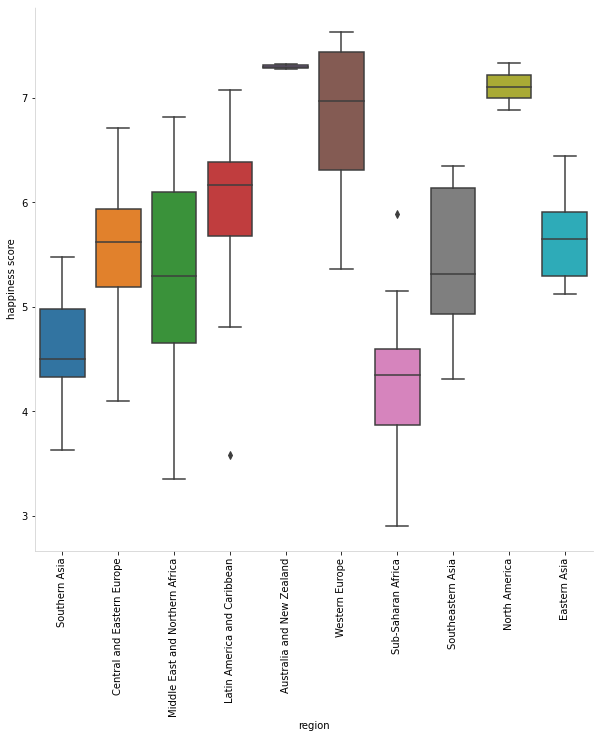

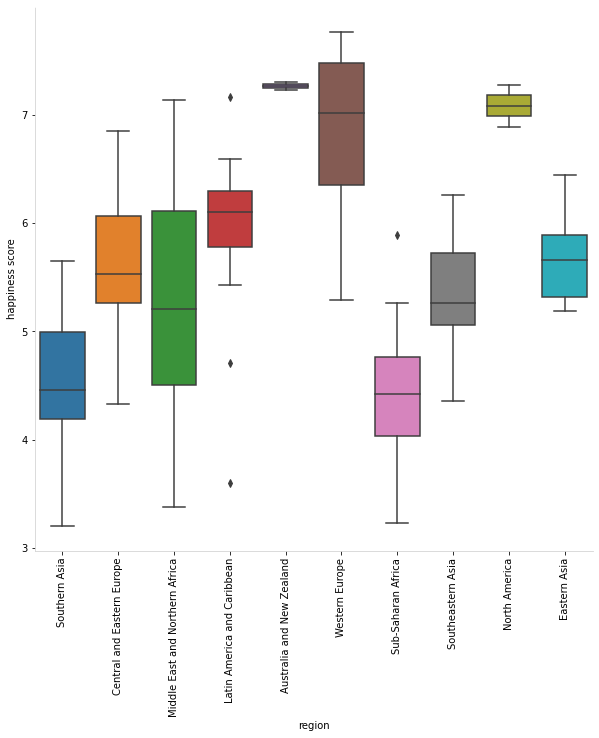

In [15]:
for frame in frames:
    box_plot(frame)

- From histograms and q-q plots above we can see that the distribution is somewhat normal acrross regions. 
- North America and Australia and NZ are an exception as they have only 2 countries each. Scores for those countries for each region are very close to another so it will be appropriate to use mean as a measure of central tendency for thise 2 regions.

- The smallest scores are obviously present in Sub-Saharan Africa, followed by Southern Asia. From box-and-whisker plots we can see that Sub-Saharan Africa and Latin America and Caribbean have outliers. Looking ast their values I think that they do not stand out too much. Also, I believe that those scores are possible because of the different socio-economic and polytical circumstances in different countries. 

- the highest scores are in North America and Australia and NZ, folowed by Western Europe and Latin America and Caribbean

- as for the shape of distributions we can see that the W.Europe and Latin Am.and Caribbean are negatively skewed, meaning that they have larger number of countries with the high score over the smaller interval. That can be also seen on Q-Q plots( points on the left are more off the line) and through box plots (lower tail is longer than the upper one, meaning that the lowest 25% of scores are spread over a bigger interval )
- Southeastern and Eastern Asia are slightly positively skewewd menaing that the top 50% of values are spread along the bigger interval

- Middle east and Northern Africa has the largest range and the largest IQR which indicated that data are more spread than in other regions . Therefore more uneven. Similar situatuion is in Central and Eastern Europe and Sub-Saharan Africa. 



So, after all we could say that Oceania is the happies region, followed by North America, Western Europe, and/or latin America and Caribbean? For the clear decision on what is the happiest continet I will also have to check the change in happines score over years. My plots in part 1 revealed a downward trend in some regions. 

I would like to see the score accross continets and over years.In order to do that I will add the year column to each data frame and concatenate them. I will use only country,region,score, and year column for my new data set.  

In [16]:
#adding the yaer column
import numpy as np

df1_new['year']=np.array('2015')
df2_new['year']=np.array('2016')
df3_new['year']=np.array('2017')
df4_new['year']=np.array('2018')
df5_new['year']=np.array('2019')

In [17]:
data=[df1_new[['country','region','happiness score','year']],df2_new[['country','region','happiness score','year']],
      df3_new[['country','region','happiness score','year']],df4_new[['country','region','happiness score','year']],
      df5_new[['country','region','happiness score','year']]]

In [18]:
score_reg=pd.concat(data,axis=0)

In [19]:
score_reg.head()

,country,region,happiness score,year
0,Afghanistan,Southern Asia,3.575,2015
1,Albania,Central and Eastern Europe,4.959,2015
2,Algeria,Middle East and Northern Africa,5.605,2015
3,Argentina,Latin America and Caribbean,6.574,2015
4,Armenia,Central and Eastern Europe,4.350,2015


In [20]:
score_reg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 145
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          730 non-null    object 
 1   region           730 non-null    object 
 2   happiness score  730 non-null    float64
 3   year             730 non-null    object 
dtypes: float64(1), object(3)
memory usage: 28.5+ KB


Now I have table with all years and all scores. We can use it to present the data on barchart to cehck for avearges and boxplot to check the spread. 

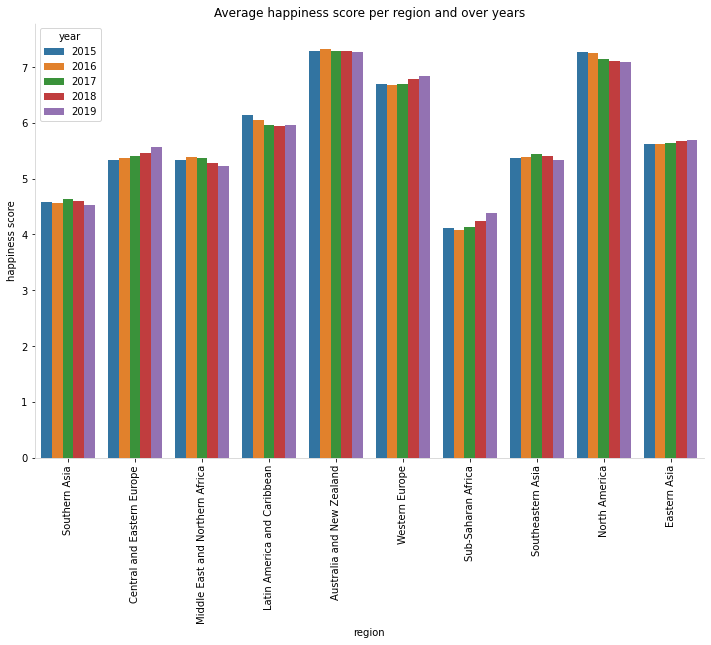

In [21]:
plt.figure(figsize=(12,8))
sns.barplot(x='region',y='happiness score',hue='year',data=score_reg,errwidth=0)
ax=plt.gca()
ax.spines[['top','right']].set_color('white')
ax.spines[['left','bottom']].set_color('lightgrey')
plt.title('Average happiness score per region and over years')
plt.xticks(rotation='vertical')
plt.show()

From the plot above we can see that Sub-Saharan Africa, Western and  Central and Eastern Europe have witnessed highest overall and constant increase in average Happiness index over years.All have witnessed their highest score in 2019 but at the same time Sub-SaharanAfrica had the lowest happiness score in the world.

On the other hand the avearage happiness index in North and Latin America has been in constant decrease over the years. North America ahs the second highest score in the world though. 

Oceania has the most stable index and by far the highest average happiness index in the world.

Southern Asia, Southeatsern Asia and Middle East and Northern Africa have varying happiness score that has been dropping over the past 3 years. 

Southern Asia also has the second lowest score in the world.


It would be interesting to compare averages for all years. 

In [22]:
round(score_reg.groupby('region')['happiness score'].mean(),2)

region
Australia and New Zealand          7.29
Central and Eastern Europe         5.43
Eastern Asia                       5.65
Latin America and Caribbean        6.01
Middle East and Northern Africa    5.32
North America                      7.17
Southeastern Asia                  5.39
Southern Asia                      4.58
Sub-Saharan Africa                 4.19
Western Europe                     6.74
Name: happiness score, dtype: float64

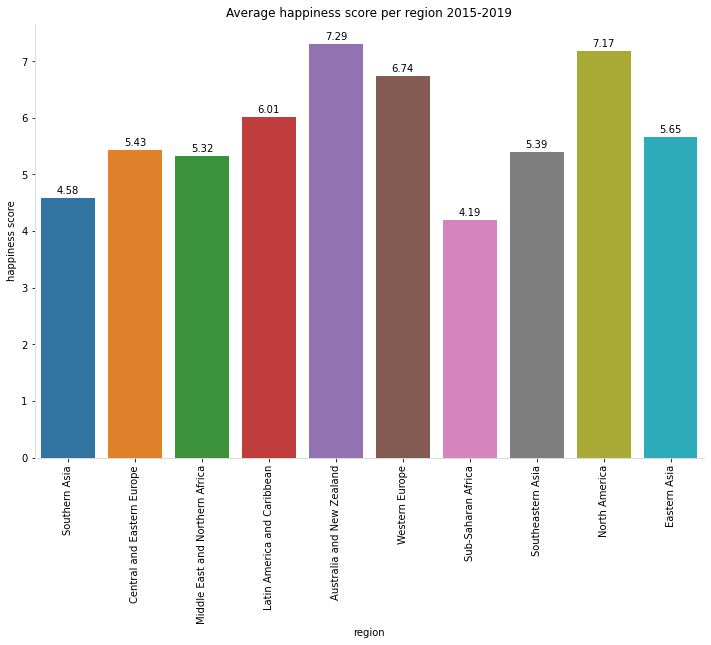

In [23]:
def display_figures(ax):
    l=[4.58,5.43, 5.32, 6.01,7.29, 6.74,4.19,5.39,7.17,5.65]
    i=0
    for p in ax.patches:
        h=p.get_height()
        if (h>0):
            value=l[i]
            ax.text(p.get_x()+p.get_width()/2,h+0.08, value, ha='center')
            i=i+1
            
plt.figure(figsize=(12,8))
plt.title('Average happiness score per region 2015-2019')
ax=sns.barplot(x='region',y='happiness score',data=score_reg,errwidth=0)
ax=plt.gca()
ax.spines[['top','right']].set_color('white')
ax.spines[['left','bottom']].set_color('lightgrey')
plt.xticks(rotation='vertical')
display_figures(ax)

From this barplot we can see how mean values can be deceiving. While Australia is no doubt in lead (it is obvious from both charts) North and Latin America have the second and the fourth overall score. If we look at the previous chart we can see that in those regions Happiness index is consistently decreasing and therefor this average happiness index has to be taken with "a grain of salt" in the future. 

For other continents this barchart shows pretty much the same as the previous one.


Let's look at the median and spread. I will use boxplots.

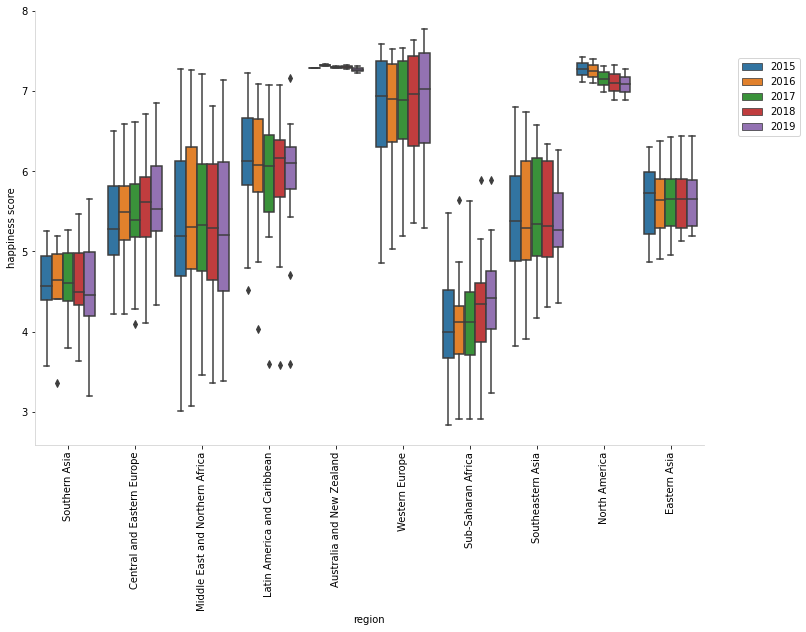

In [24]:
plt.figure(figsize=(12,8))
sns.boxplot( hue='year', y='happiness score', x='region',data=score_reg)
ax=plt.gca()
ax.spines[['top','right']].set_color('white')
ax.spines[['left','bottom']].set_color('lightgrey')
plt.xticks(rotation='vertical')
plt.legend(bbox_to_anchor=(1.15,0.9))
plt.show()

From here we can see that the Oceania has the smallest spread and the higest values.

Western Europe has the third overall score but relatively large range which worns us of high variability in thew happiness scores accros countries in this region.That is especially visible in the lowest 25% of the scores. 

The range of score (max-min) has been increasing over time in Southern Asia and Central and Eastern Europe. That tells us that the variability of happiness index has been increasing over years which is not a good indicator. 

Latin America has realtively small range but a lot of outliers(extreme values). In 2019 the range is smallest but the happiness index is also the smallest. that just tells us that the scores are becoming more similar accross the region and they're dropping.

The most variability we can see in the Middle east and Northern Africa region.

Another cool way to visualize and compare scores is through treemaps. For that I need to make a new column

# Investigating countries

In [25]:
import plotly.express as px

def tree(frame):
    plt.figure(figsize=(14,14))
    fig = px.treemap(frame, 
                     path=['region','country'], 
                     values='happiness score',
                     color='happiness score'
                    )
    fig.show()

In [26]:
tree(df1_new)

<Figure size 1008x1008 with 0 Axes>

In [27]:
tree(df2_new)

<Figure size 1008x1008 with 0 Axes>

Treemaps are a nice visual way pof presenting quantities. In this case are and color are indicating the happiness score. However,it is not easy from here to say which countries have increased their happiness score and vice versa. For that,I will create the growth index. Growth index will be a sum of all differences in score of successive years, which is equivalent to score 2019-2015.  If the sum is negative there has been more drop in the score than rise for that country and vise versa. 

There is no need to this for regions as we can see from bar charts above that the only region that had extreme up and downs is North America.

In [28]:
 #creating the new data frame named df_growth
df_growth=pd.DataFrame(data=np.array([df1_new.country,df1_new.region,df1_new['happiness score'],df2_new['happiness score'],
                                  df3_new['happiness score'],df4_new['happiness score'],df5_new['happiness score']]).transpose(),index=df1_new.index,
                            columns=['country','region','score_15','score_16','score_17','score_18','score_19'])

In [29]:
df_growth.head()

,country,region,score_15,score_16,score_17,score_18,score_19
0,Afghanistan,Southern Asia,3.575,3.36,3.794,3.632,3.203
1,Albania,Central and Eastern Europe,4.959,4.655,4.644,4.586,4.719
2,Algeria,Middle East and Northern Africa,5.605,6.355,5.872,5.295,5.211
3,Argentina,Latin America and Caribbean,6.574,6.65,6.599,6.388,6.086
4,Armenia,Central and Eastern Europe,4.35,4.36,4.376,4.321,4.559


In [30]:
#creating column growth percentage
df_growth['growth_percentage']=((df_growth['score_19']-df_growth['score_15'])/df_growth['score_15']*100)

In [31]:
df_growth['growth_percentage']=df_growth['growth_percentage'].astype(float).round(2)

In [32]:
df_growth.head()

,country,region,score_15,score_16,score_17,score_18,score_19,growth_percentage
0,Afghanistan,Southern Asia,3.575,3.36,3.794,3.632,3.203,-10.41
1,Albania,Central and Eastern Europe,4.959,4.655,4.644,4.586,4.719,-4.84
2,Algeria,Middle East and Northern Africa,5.605,6.355,5.872,5.295,5.211,-7.03
3,Argentina,Latin America and Caribbean,6.574,6.65,6.599,6.388,6.086,-7.42
4,Armenia,Central and Eastern Europe,4.35,4.36,4.376,4.321,4.559,4.80


In [33]:
#separating positive and negative growth into the  spearate data frames
df_growth_pos=df_growth[df_growth['growth_percentage']>=0][['country','region','growth_percentage']].sort_values(by='growth_percentage',
                                                                               axis=0,ascending=False)

In [34]:
df_growth_neg=df_growth[df_growth['growth_percentage']<0][['country','region','growth_percentage']].sort_values(by='growth_percentage',
                                                                               axis=0,ascending=True)

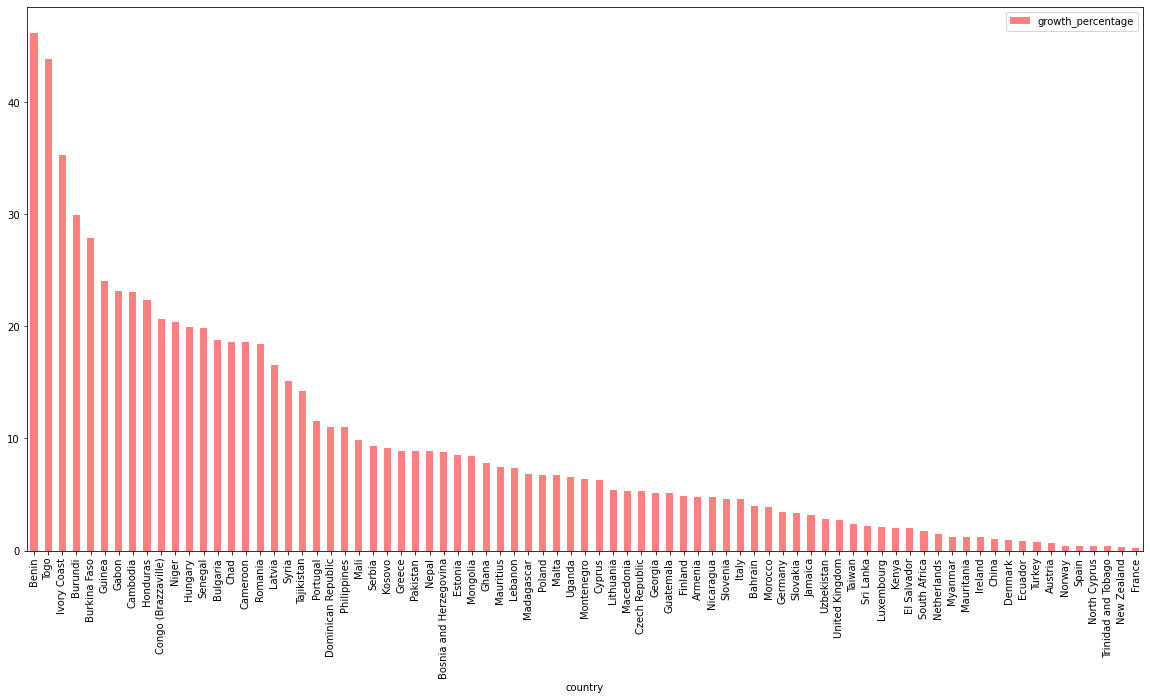

In [35]:
#I will not make a bar chart for these two to see which countries had the highest growth
df_growth_pos.plot(x='country',y='growth_percentage',kind='bar',figsize=(20,10),color='red',alpha=0.5)
plt.show()

In [36]:
print(f"Percentage of countries whose Happiness score has increased for more than 20% is:{len(df_growth_pos[df_growth_pos['growth_percentage']>20])/len(df_growth_pos)*100}")

Percentage of countries whose Happiness score has increased for more than 20% is:13.924050632911392


In [37]:
df_growth_pos.head(11)

,country,region,growth_percentage
12,Benin,Sub-Saharan Africa,46.20
129,Togo,Sub-Saharan Africa,43.89
62,Ivory Coast,Sub-Saharan Africa,35.27
20,Burundi,Sub-Saharan Africa,29.95
19,Burkina Faso,Sub-Saharan Africa,27.88
49,Guinea,Sub-Saharan Africa,24.02
43,Gabon,Sub-Saharan Africa,23.18
21,Cambodia,Southeastern Asia,23.07
51,Honduras,Latin America and Caribbean,22.39
28,Congo (Brazzaville),Sub-Saharan Africa,20.63


We can also see that the leading country is Benin with 46% increase in happines score. Out of 11 top countries that have witnessed the prercentage growth, 9 of them is in Sub-Saharan Africa. This actually confirms the fact that there wasa steady growth in the happoness index from 2015-2019 in that region . 

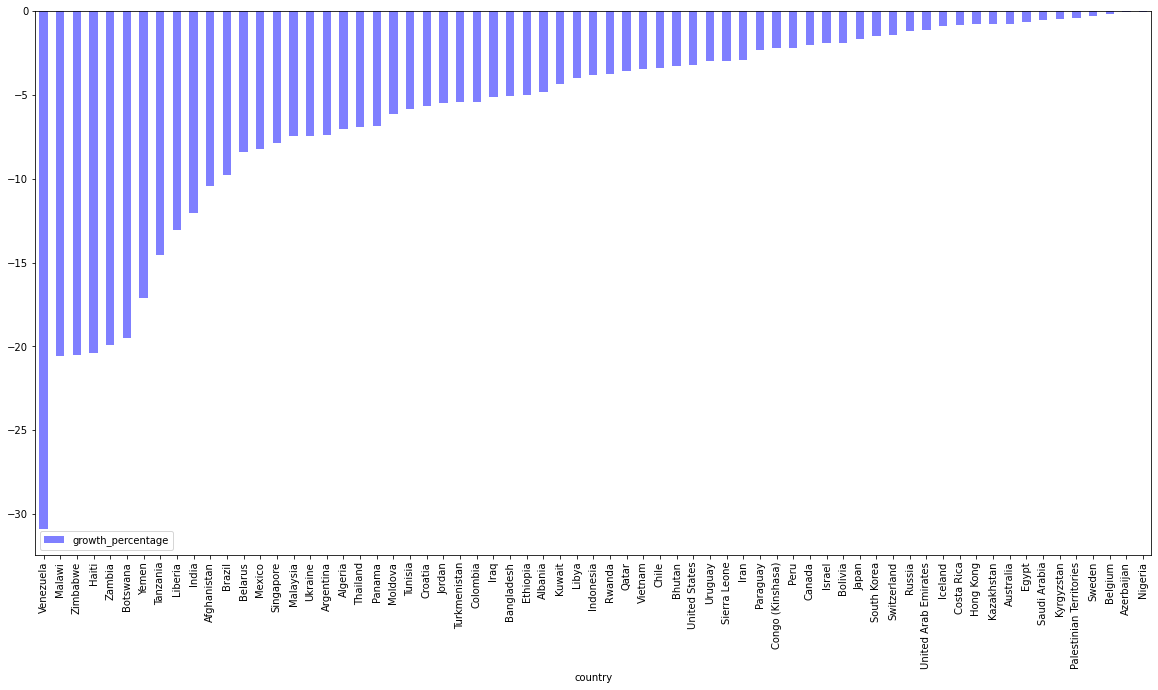

In [38]:
#I will not make a bar chart for these two to see which countries had the highest drop
df_growth_neg.plot(x='country',y='growth_percentage',kind='bar',figsize=(20,10),color='blue',alpha=0.5)
plt.show()

In [39]:
df_growth_neg.head(20)

,country,region,growth_percentage
141,Venezuela,Latin America and Caribbean,-30.88
79,Malawi,Sub-Saharan Africa,-20.55
145,Zimbabwe,Sub-Saharan Africa,-20.54
50,Haiti,Latin America and Caribbean,-20.39
144,Zambia,Sub-Saharan Africa,-19.93
16,Botswana,Sub-Saharan Africa,-19.48
143,Yemen,Middle East and Northern Africa,-17.10
127,Tanzania,Sub-Saharan Africa,-14.55
73,Liberia,Sub-Saharan Africa,-13.04
55,India,Southern Asia,-12.05


In [40]:
print(f"Percentage of countries whose Happiness score has decreased for more than 20% is:{len(df_growth_neg[df_growth_neg['growth_percentage']<-20])/len(df_growth_neg)*100}")

Percentage of countries whose Happiness score has decreased for more than 20% is:5.970149253731343


The percentage of countries that have drop of 20% or more in happiness score is less than the number of countries with the increase in the score. Venezuela had the highest drop of 30%. Some other Latin American countries are on the list of countries with negative growth percentage(Haiti, Brazil, Argentina). Let's look more into the Latin America and Caribbean

<AxesSubplot:xlabel='country'>

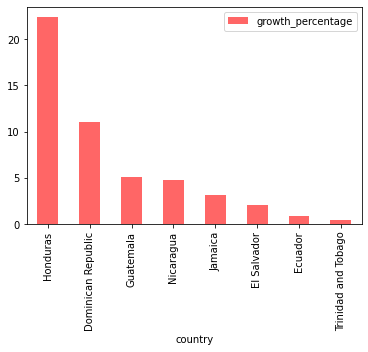

In [50]:
#countries in SA with positive growth
df_growth_pos[df_growth_pos['region']=='Latin America and Caribbean'].plot(x='country',y='growth_percentage',kind='bar',color='red',alpha=0.6)

<AxesSubplot:xlabel='country'>

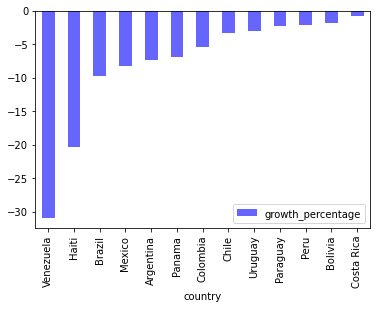

In [51]:
#countries in SA with negative growth
df_growth_neg[df_growth_neg['region']=='Latin America and Caribbean'].plot(x='country',y='growth_percentage',kind='bar',color='blue',alpha=0.6)

So from here I see that the statement from before that South America is witnessing the steady drop in happines score is True. Less countries had an increase in happines score over the last 5 years and the positive growth is smaller than the negative growth.

# Conclusion 

In this project we were able to see how the happines score have changed over years and accross continents. We also have seen how the mean value can be deceiving. While Africa has the lowest happiness score, it's happines score has inceasing trend over years and it is to expect that it will grow (the general feelings or living conditions are changing towards better). On the other hand it looks that North and Latin America are experincing the negative trend and unless soemthing is done it will proobably stay negative. 

One thing to consider is the population affected by the happiness score.For example Honduras contributes evenly to the mean score of Latin America and it has relatively large percentage growth but smaller population. On the other hand Argentina has around 25 times larger population and it has negative happiness score. So,Honduras score is driving the mean up while actually the smaller number of people are affected by this positive score and much larger numer of people have been afected by the negative score. 